In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head() # Head table for exploration
list(df.columns) # Column names

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [3]:
# Feature selection
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


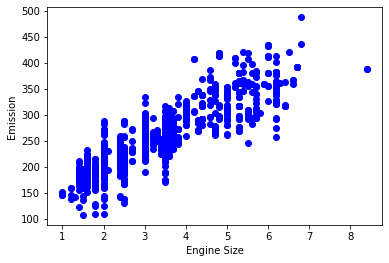

In [4]:
# Plotting engine size vs co2 missions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [5]:
# Dividing data into mutually exclusive test and train datasets
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk]

In [6]:
train.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


In [7]:
# Polynomial Regression 
## Relationship between independent variable x and dependent variable y is modeled as an nth degree polynomial in x ; 𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2) # Power zero to 2
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
# Using linear regression to solve the relationship
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# Printing coefficients
print('coefficients:', clf.coef_)
print('Intercept:', clf.intercept_) # parameters and intercept are needed parameters for curvy line

coefficients: [[ 0.         50.28386206 -1.47712248]]
Intercept: [107.29919426]


Text(0, 0.5, 'Emission')

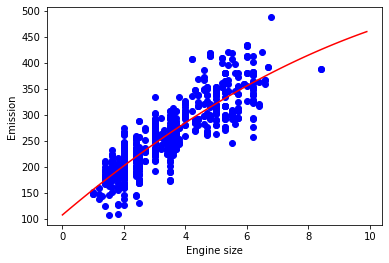

In [13]:
# Plotting the curvy line using coefficients and intercepts
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]* XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
# Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares: %.2f" %np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 22.89
Residual sum of squares: 855.40
R2-score: 0.71


In [ ]:
## Using cubic polynomial 
